                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     95.38
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.45e-11
Time:                        12:18:35   Log-Likelihood:                -82.940
No. Observations:                  25   AIC:                             171.9
Df Residuals:                      22   BIC:                             175.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.4720      5.955     24.093      0.0

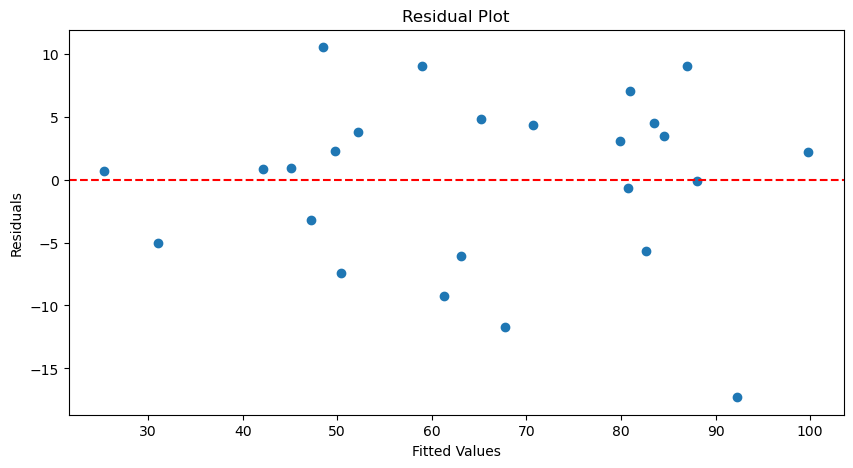

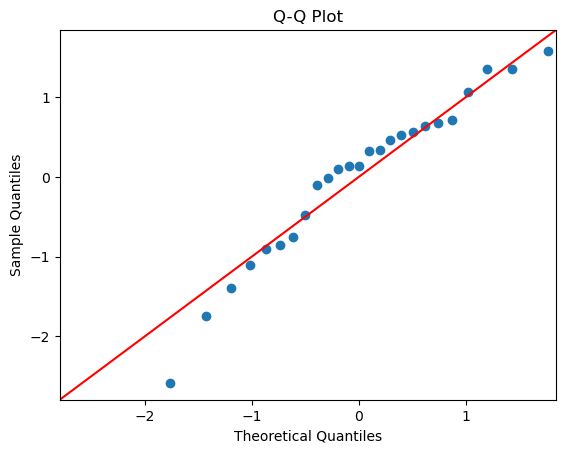

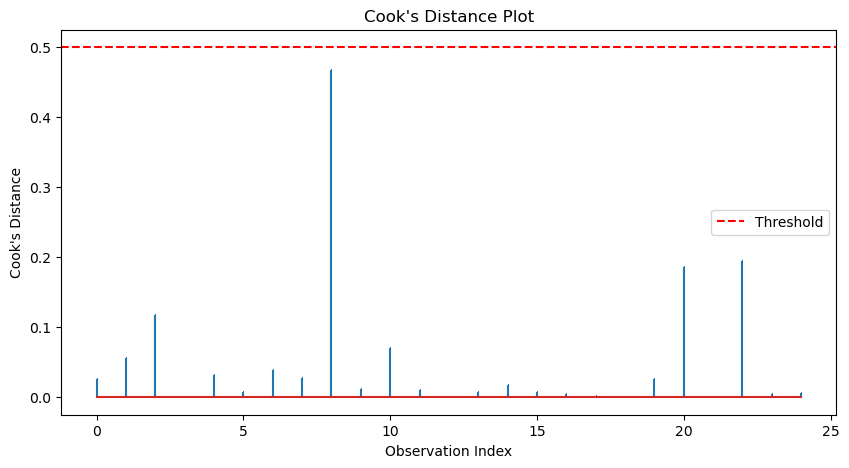

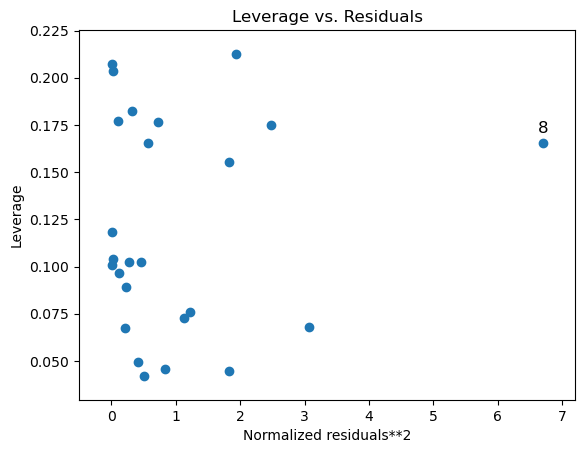

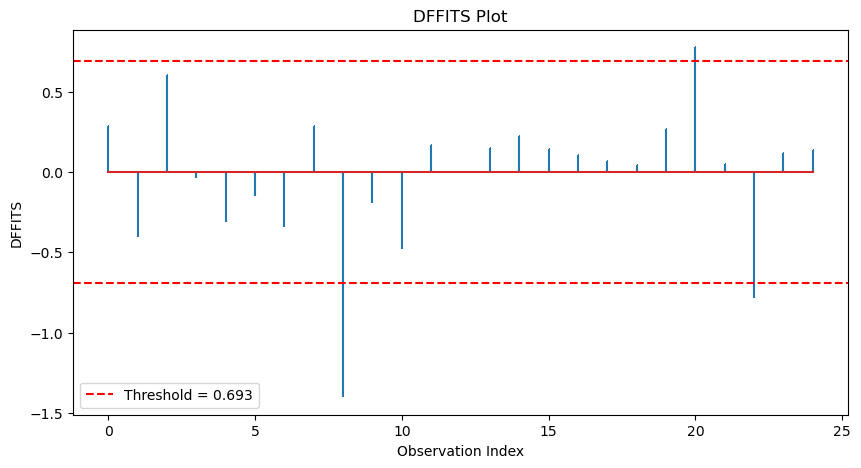

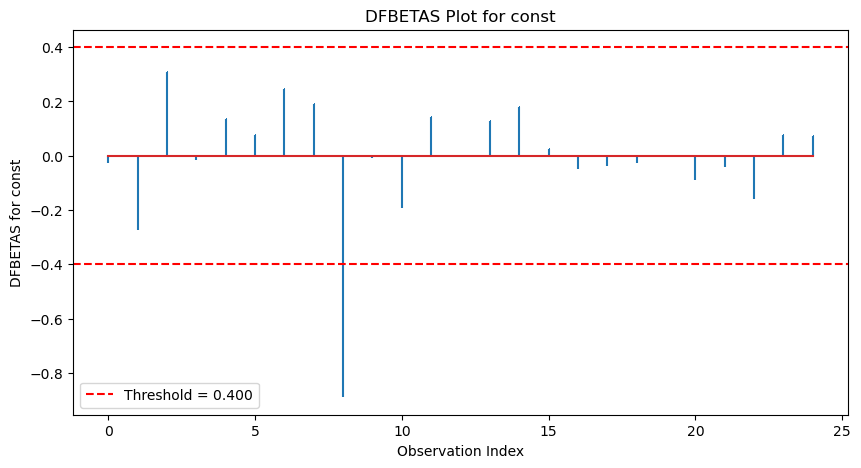

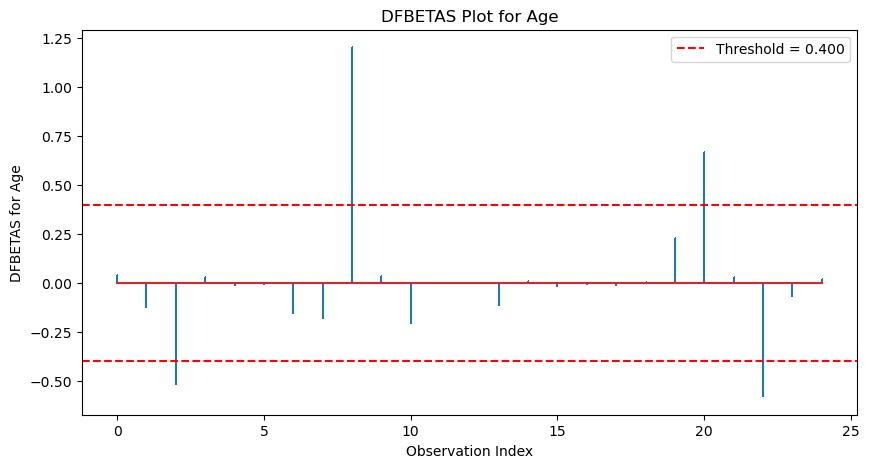

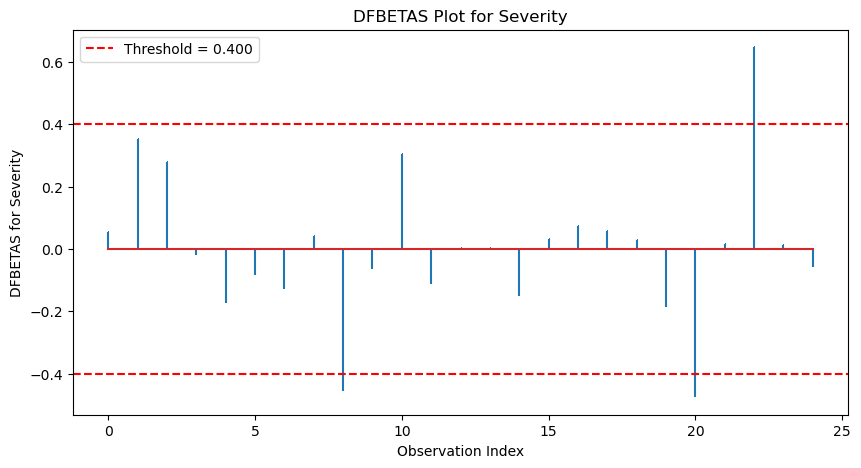

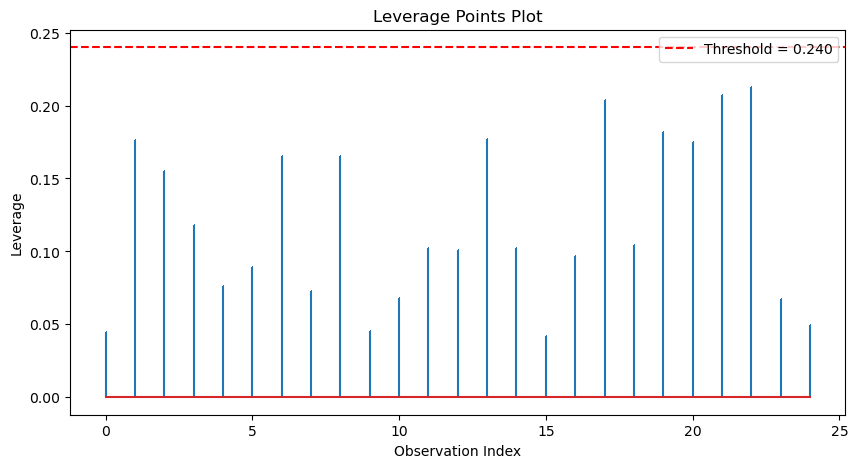

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence

data = pd.read_csv('Patient.csv')
data.columns = data.columns.str.strip()
for col in ['Age', 'Severity', 'Anxiety', 'Satisfaction', 'Surg-Med']:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
required_cols = ['Age', 'Severity', 'Satisfaction']
data = data[[c for c in required_cols if c in data.columns]].dropna().reset_index(drop=True)
y = data['Satisfaction']
X = data[['Age', 'Severity']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

plt.figure(figsize=(10, 5))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

sm.qqplot(model.resid, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(0.5, color='red', linestyle='--', label="Threshold")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()

plot_leverage_resid2(model)
plt.title('Leverage vs. Residuals')
plt.show()

dffits = influence.dffits[0]
p = X.shape[1]
n = len(y)
dffits_thresh = 2 * np.sqrt(p / n)
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(dffits)), dffits, markerfmt=",")
plt.axhline(dffits_thresh, color='red', linestyle='--', label=f'Threshold = {dffits_thresh:.3f}')
plt.axhline(-dffits_thresh, color='red', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('DFFITS')
plt.title('DFFITS Plot')
plt.legend()
plt.show()

dfbetas = influence.dfbetas
dfbetas_thresh = 2 / np.sqrt(n)
for i, predictor in enumerate(X.columns):
    plt.figure(figsize=(10, 5))
    plt.stem(np.arange(len(dfbetas)), dfbetas[:, i], markerfmt=",")
    plt.axhline(dfbetas_thresh, color='red', linestyle='--', label=f'Threshold = {dfbetas_thresh:.3f}')
    plt.axhline(-dfbetas_thresh, color='red', linestyle='--')
    plt.xlabel('Observation Index')
    plt.ylabel(f'DFBETAS for {predictor}')
    plt.title(f'DFBETAS Plot for {predictor}')
    plt.legend()
    plt.show()

leverage = influence.hat_matrix_diag
lev_thresh = 2 * (p / n)
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(leverage)), leverage, markerfmt=",")
plt.axhline(lev_thresh, color='red', linestyle='--', label=f'Threshold = {lev_thresh:.3f}')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.title('Leverage Points Plot')
plt.legend()
plt.show()
